In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [5]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 153s 1us/step


In [6]:
train_images,test_images = train_images/255.0,test_images/255.0

In [8]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10)
])

/home/mothish/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

In [12]:
history = model.fit(train_images,train_labels,epochs = 3, validation_data = (test_images,test_labels))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3737 - loss: 1.7152 - val_accuracy: 0.5601 - val_loss: 1.2396
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5851 - loss: 1.1718 - val_accuracy: 0.6270 - val_loss: 1.0626
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6517 - loss: 1.0076 - val_accuracy: 0.6591 - val_loss: 0.9841


In [13]:
test_acc = model.evaluate(test_images,test_labels ,verbose =2)
print(f'Test Accuracy : {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.6591 - loss: 0.9841
Test Accuracy : [0.9840651154518127, 0.6590999960899353]


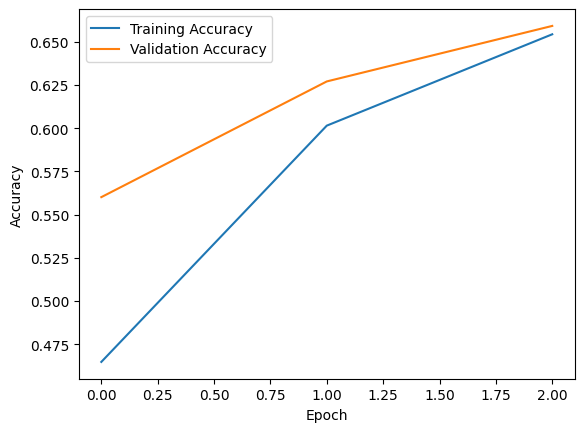

In [14]:
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
